In [20]:
#reading in all of the files
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download()

chapters_filepath = '/Users/reemsheikh/Documents/Harry_Potter_Movies/Chapters.csv'
chapters_data = pd.read_csv(chapters_filepath, encoding = 'latin1')

characters_filepath = '/Users/reemsheikh/Documents/Harry_Potter_Movies/Characters.csv'
characters_data = pd.read_csv(characters_filepath, encoding = 'latin1')

dialogue_filepath = '/Users/reemsheikh/Documents/Harry_Potter_Movies/Dialogue.csv'
dialogue_data = pd.read_csv(dialogue_filepath, encoding = 'latin1')

movies_filepath = '/Users/reemsheikh/Documents/Harry_Potter_Movies/Movies.csv'
movies_data = pd.read_csv(movies_filepath)

places_filepath = '/Users/reemsheikh/Documents/Harry_Potter_Movies/Places.csv'
places_data = pd.read_csv(places_filepath)

spells_filepath = '/Users/reemsheikh/Documents/Harry_Potter_Movies/Spells.csv'
spells_data = pd.read_csv(spells_filepath)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [21]:
#taking the dialogue_data dataset and sectioning it off into harry, ron, and hermione dialogue to work with 

harry_dialogue = dialogue_data.loc[dialogue_data['Character ID'] == 1] 
ron_dialogue = dialogue_data.loc[dialogue_data['Character ID'] == 2]
hermione_dialogue = dialogue_data.loc[dialogue_data['Character ID'] == 3]

In [22]:
#creating a list of all the spells 
#creating lists of the harry, ron, and hermione dialogue data
spell_list = spells_data['Incantation'].tolist()
harry_dialogue_list = harry_dialogue['Dialogue'].tolist()
ron_dialogue_list = ron_dialogue['Dialogue'].tolist()
hermione_dialogue_list = hermione_dialogue['Dialogue'].tolist()


In [23]:
#finding all of the dialogue that has a spell in it for each character and creating lists of that dialogue 
#for each character respectively
#creating lists of all the spells that each character used 

#!!!
#for whatever reason the first element of the hermione_spell_dialogue repeats itself twice; used .pop(0) to resolve
#^same issue with the second element of harry_spell_dialogue

harry_spell_dialogue = []
harry_spells = []
for dialogue in harry_dialogue_list: 
    for spell in spell_list: 
        if spell in dialogue:
            harry_spell_dialogue.append(dialogue)
            harry_spells.append(spell)
            
hermione_spell_dialogue = []
hermione_spells = []
for dialogue in hermione_dialogue_list: 
    for spell in spell_list: 
        if spell in dialogue: 
            hermione_spell_dialogue.append(dialogue)
            hermione_spells.append(spell)
del hermione_spell_dialogue[0]
            
ron_spell_dialogue = []
ron_spells = []
for dialogue in ron_dialogue_list: 
    for spell in spell_list: 
        if spell in dialogue: 
            ron_spell_dialogue.append(dialogue)
            ron_spells.append(spell)
            
all_char_spells = harry_spells + hermione_spells + ron_spells 

In [24]:
#function that counts the number of unique spells for each character and the total amount of times that they called 
#spells
def spell_counter(lst):
    spell_counts = {}
    unique_spells = []
    if lst == harry_spells: 
        character = 'Harry Potter'
    if lst == hermione_spells: 
        character = 'Hermione Granger'
    if lst == ron_spells: 
        character = 'Ron Weasley'
    if lst == all_char_spells: 
        character = 'All three characters'
    for element in lst:
        if element in spell_counts:
            spell_counts[element] += 1
        else:
            spell_counts[element] = 1
    for spell, count in spell_counts.items():
        unique_spells.append(spell)
    print(character + ' made ' + str(len(unique_spells)) + ' unique incantations, for a grand total of ' + str(len(lst)) + ' incantations throughout the movie scripts.')
    return spell_counts


In [25]:
#function that finds the spells characters have in common and returns a dictionary with those spells, 
#and the sum of how many times they occur between characters
def common_spells(*dicts): 
    common_keys = set.intersection(*[set(d.keys()) for d in dicts])
    common_dict = {}
    for key in common_keys: 
        common_dict[key] = sum(d[key] for d in dicts)
    return common_dict

#using the spell_counter function to gather data about the spells from each character
#then using the common_spells function to determine which spells the characters have in common 
harry_dict = spell_counter(harry_spells)
hermione_dict = spell_counter(hermione_spells)
ron_dict = spell_counter(ron_spells)
all_char_dict = spell_counter(all_char_spells)

Harry Potter made 20 unique incantations, for a grand total of 44 incantations throughout the movie scripts.
Hermione Granger made 21 unique incantations, for a grand total of 29 incantations throughout the movie scripts.
Ron Weasley made 6 unique incantations, for a grand total of 7 incantations throughout the movie scripts.
All three characters made 36 unique incantations, for a grand total of 80 incantations throughout the movie scripts.


In [26]:
common_spells(harry_dict, ron_dict, hermione_dict)


{'Alohomora': 5, 'Lumos': 11, 'Imperio': 3}

In [27]:
spells_in_common = list(common_spells(harry_dict, ron_dict, hermione_dict).keys())
counts_in_common = list(common_spells(harry_dict, ron_dict, hermione_dict).values())

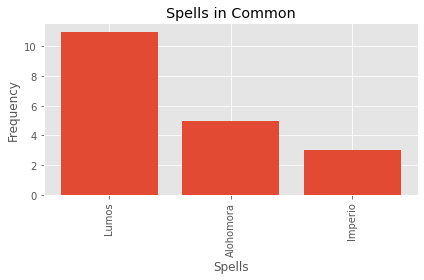

In [28]:
sorted_spells, sorted_counts = zip(*sorted(zip(spells_in_common, counts_in_common), key=lambda x: x[1], reverse=True))
fig, ax = plt.subplots()

ax.bar(sorted_spells, sorted_counts)

ax.set_xlabel('Spells')
ax.set_ylabel('Frequency')
ax.set_title('Spells in Common')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


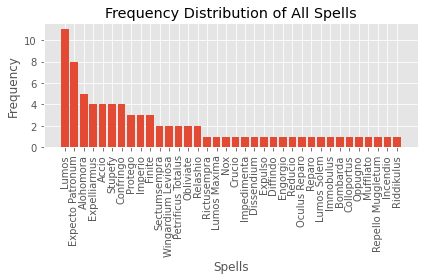

In [30]:
spells = list(all_char_dict.keys())
counts = list(all_char_dict.values())
sorted_spells, sorted_counts = zip(*sorted(zip(spells, counts), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots()

ax.bar(sorted_spells, sorted_counts)

ax.set_xlabel('Spells')
ax.set_ylabel('Frequency')
ax.set_title('Frequency Distribution of All Spells')

plt.xticks(rotation= 90)

plt.tight_layout()
plt.show()

In [31]:
#classifying each spell by their location 
#incomplete, needs to be worked on later

In [32]:
#Diagon_Alley = places_data.loc[places_data['Place Category'] == 'Diagon Alley']
#Dwellings = places_data.loc[places_data['Place Category'] == 'Dwellings']
#Hogsmeade = places_data.loc[places_data['Place Category'] == 'Hogsmeade']
#Hogwarts = places_data.loc[places_data['Place Category'] == 'Hogwarts']
#Other_Magical_Locations = places_data.loc[places_data['Place Category'] == 'Other Magical Locations']

In [33]:
#DiagonAlley_ID_list = Diagon_Alley['Place ID'].tolist()
#Dwellings_ID_list = Dwellings['Place ID'].tolist()
#Hogsmeade_ID_list = Hogsmeade['Place ID'].tolist()
#Hogwarts_ID_list = Hogwarts['Place ID'].tolist()
#Other_ID_List = Other_Magical_Locations['Place ID'].tolist()

In [34]:
len(harry_dialogue_list)

1922

In [35]:
#sentiment analysis 
example = harry_dialogue_list[1900]
print(example)
tokens = nltk.word_tokenize(example)
tagged = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint


Sir, my mother's Patronus. It was a doe, wasn't it? Just like Professor Snape's. Curious, don't you think?


<bound method Tree.pprint of Tree('S', [Tree('GPE', [('Sir', 'NNP')]), (',', ','), ('my', 'PRP$'), ('mother', 'NN'), ("'s", 'POS'), Tree('PERSON', [('Patronus', 'NNP')]), ('.', '.'), ('It', 'PRP'), ('was', 'VBD'), ('a', 'DT'), ('doe', 'NN'), (',', ','), ('was', 'VBD'), ("n't", 'RB'), ('it', 'PRP'), ('?', '.'), ('Just', 'NNP'), ('like', 'IN'), Tree('ORGANIZATION', [('Professor', 'NNP'), ('Snape', 'NNP')]), ("'s", 'POS'), ('.', '.'), Tree('PERSON', [('Curious', 'NNP')]), (',', ','), ('do', 'VBP'), ("n't", 'RB'), ('you', 'PRP'), ('think', 'VB'), ('?', '.')])>

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# List to store sentiment scores for each dialogue
harry_sentiment_scores = []

# Loop through each dialogue in harry_dialogue_list
for dialogue in harry_dialogue_list:
    # Calculate sentiment scores for the current dialogue
    scores = sia.polarity_scores(dialogue)
    harry_sentiment_scores.append(scores)


# Calculate overall sentiment score
harry_overall_sentiment = {
    'positive': sum(score['pos'] for score in harry_sentiment_scores) / len(harry_sentiment_scores),
    'neutral': sum(score['neu'] for score in harry_sentiment_scores) / len(harry_sentiment_scores),
    'negative': sum(score['neg'] for score in harry_sentiment_scores) / len(harry_sentiment_scores),
    'compound': sum(score['compound'] for score in harry_sentiment_scores) / len(harry_sentiment_scores)
}

print("Harry's Overall Sentiment Scores:", harry_overall_sentiment)

    
    

hermione_sentiment_scores = []

# Loop through each dialogue in harry_dialogue_list
for dialogue in hermione_dialogue_list:
    # Calculate sentiment scores for the current dialogue
    scores = sia.polarity_scores(dialogue)
    hermione_sentiment_scores.append(scores)


# Calculate overall sentiment score
hermione_overall_sentiment = {
    'positive': sum(score['pos'] for score in hermione_sentiment_scores) / len(hermione_sentiment_scores),
    'neutral': sum(score['neu'] for score in hermione_sentiment_scores) / len(hermione_sentiment_scores),
    'negative': sum(score['neg'] for score in hermione_sentiment_scores) / len(hermione_sentiment_scores),
    'compound': sum(score['compound'] for score in hermione_sentiment_scores) / len(hermione_sentiment_scores)
}

print("Hermione's Overall Sentiment Scores:", hermione_overall_sentiment)




ron_sentiment_scores = []

# Loop through each dialogue in harry_dialogue_list
for dialogue in ron_dialogue_list:
    # Calculate sentiment scores for the current dialogue
    scores = sia.polarity_scores(dialogue)
    ron_sentiment_scores.append(scores)


# Calculate overall sentiment score
ron_overall_sentiment = {
    'positive': sum(score['pos'] for score in ron_sentiment_scores) / len(ron_sentiment_scores),
    'neutral': sum(score['neu'] for score in ron_sentiment_scores) / len(ron_sentiment_scores),
    'negative': sum(score['neg'] for score in ron_sentiment_scores) / len(ron_sentiment_scores),
    'compound': sum(score['compound'] for score in ron_sentiment_scores) / len(ron_sentiment_scores)
}

print("Ron's Overall Sentiment Scores:", ron_overall_sentiment)


Harry's Overall Sentiment Scores: {'positive': 0.1105338189386053, 'neutral': 0.804789281997918, 'negative': 0.08467637877211244, 'compound': 0.012938657648283032}
Hermione's Overall Sentiment Scores: {'positive': 0.10480542452830188, 'neutral': 0.8112252358490564, 'negative': 0.08397287735849057, 'compound': 0.015622759433962264}
Ron's Overall Sentiment Scores: {'positive': 0.10681734104046241, 'neutral': 0.779882080924855, 'negative': 0.11330173410404631, 'compound': -0.01595942196531791}


In [37]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [39]:
from transformers import pipeline